In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.utils import shuffle
import plotly.graph_objects as go
import csv
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import string
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/warwick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/warwick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/warwick/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [38]:
import seaborn as sns
import itertools
import wordcloud
from nltk import word_tokenize
from PIL import Image

In [3]:
tweets = pd.read_csv("data_elonmusk.csv", encoding='latin1')
tweets = tweets.assign(Time=pd.to_datetime(tweets.Time)).drop(['row ID','User'], axis='columns')
n_data = tweets.shape[0]
feature_list = tweets.columns
print("the number of tweets is:", n_data)
print("features are:", feature_list)
print("the number of features are:", len(feature_list))

the number of tweets is: 3218
features are: Index(['Tweet', 'Time', 'Retweet from'], dtype='object')
the number of features are: 3


In [20]:
print("Ratio of whether a tweet is a retweet:")
print(tweets['Retweet from'].notnull().value_counts() / len(tweets),'\n')
print("Ratio of tweets containing url")
print(tweets.Tweet.str.contains('https://').value_counts() / len(tweets),'\n')
print("Ratio of whether a tweet is a reply:")
print(tweets.Tweet.str.contains('@').value_counts() / len(tweets))

Ratio of whether a tweet is a retweet:
False    0.836855
True     0.163145
Name: Retweet from, dtype: float64 

Ratio of tweets containing url
False    0.748602
True     0.251398
Name: Tweet, dtype: float64 

Ratio of whether a tweet is a reply:
True     0.643567
False    0.356433
Name: Tweet, dtype: float64


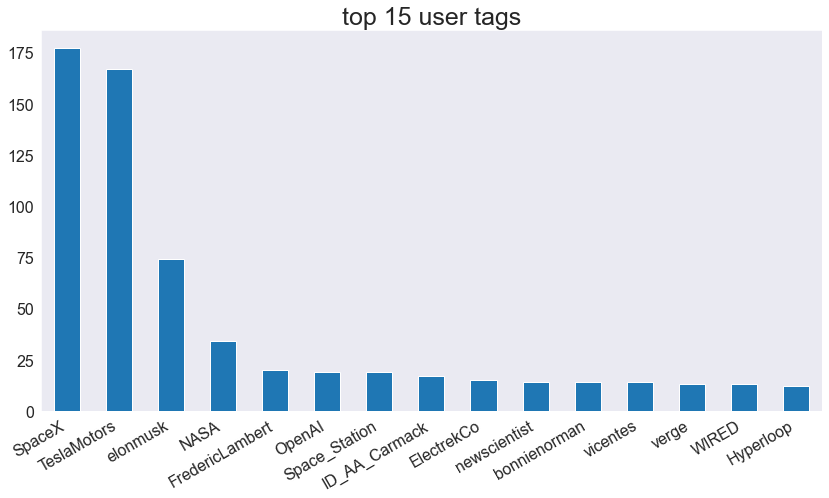

In [13]:
user_tags = list(
itertools.chain(
    *tweets.Tweet.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist()))

top_user_tags = pd.Series(user_tags).value_counts().head(15)
top_user_tags.plot.bar(figsize=(14, 7), fontsize=16)
plt.gca().set_title('top 15 user tags', fontsize=25)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=30, ha='right', fontsize=16)
pass

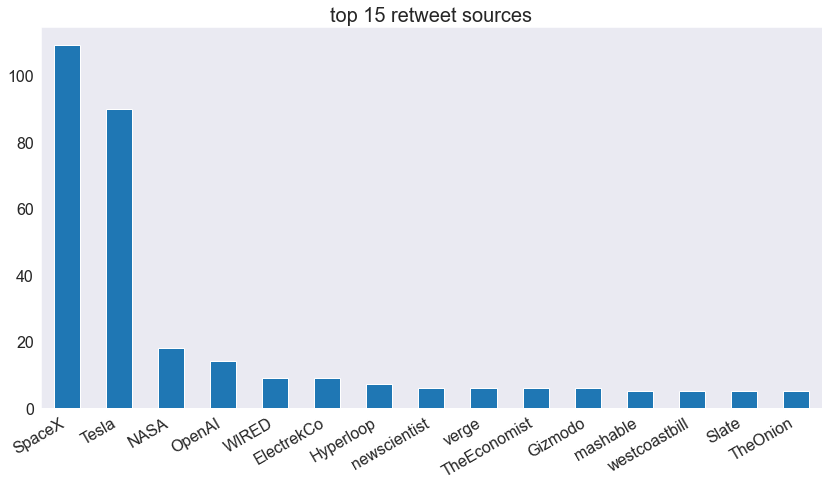

In [14]:
tweets['Retweet from'].value_counts().head(15).plot.bar(figsize=(14, 7), fontsize=16)
plt.gca().set_title('top 15 retweet sources', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=30, ha='right', fontsize=16)
pass

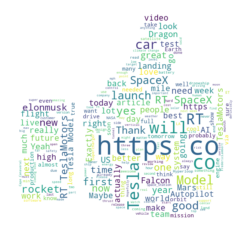

In [34]:
text = tweets["Tweet"]
text_mask = np.array(Image.open('upvote.png'))
text_list = " ".join(str(i) for i in text)
wc = wordcloud.WordCloud(background_color = "white",mask = text_mask).generate(text_list)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

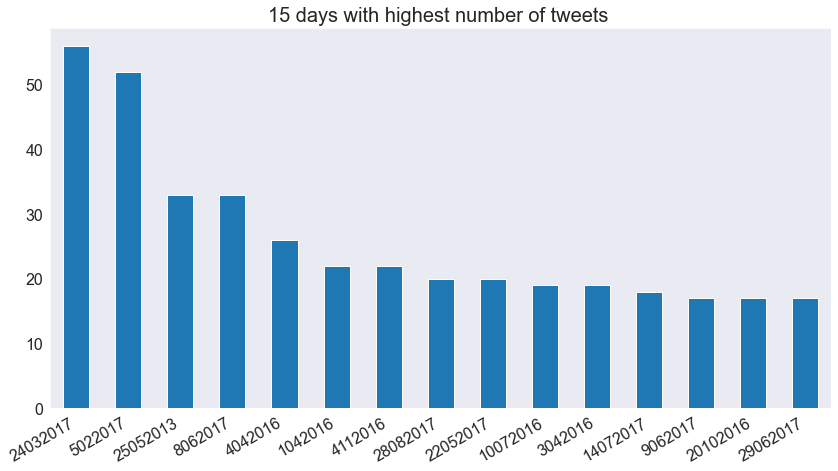

In [37]:
times = tweets['Time'][:].tolist()
times = [int(times[i].strftime("%d%m%Y")) for i in range(len(tweets))]
tweets.loc[:,("time_string")] = times
tweets['time_string'].value_counts().head(15).plot.bar(figsize=(14, 7), fontsize=16)
plt.gca().set_title('15 days with highest number of tweets ', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=30, ha='right', fontsize=16)
pass

In [55]:
print(tweets['time_string'].head())
print(tweets['time_string'].tail())
#therefore, we find that the first tweet is on 2012/11/16 and the last tweet is on 2017/09/29

0    29092017
1    29092017
2    29092017
3    29092017
4    29092017
Name: time_string, dtype: int64
3213    20112012
3214    20112012
3215    20112012
3216    19112012
3217    16112012
Name: time_string, dtype: int64


In [44]:
tokens = tweets.Tweet.map(word_tokenize)
#tweets about tesla
tesla_tweet = tweets.loc[tokens.map(lambda sent: 'tesla' in sent or 'tesla'.title() in sent).values].Tweet.values.tolist()
print(tesla_tweet[0])
print("the number of tesla tweets is:", len(tesla_tweet))

@Bobby_Gupta Def not ok. Just sent a reminder to Tesla stores that we just want people to look forward to their nex? https://t.co/z4KuEhvl4a
the number of tesla tweets is: 357


In [50]:
w = 'car'
car_tweets= tweets.loc[tokens.map(lambda sent: w in sent or w.title() in sent).values].Tweet.values.tolist()
print("the number of car tweets is:", len(car_tweets))

the number of car tweets is: 110
